<a href="https://colab.research.google.com/github/Zain-mahfoud94/PyTorch-for-Deep-Learning-Bootcamp/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for nn
import matplotlib.pyplot as plt
import numpy as np
# check PyTorch version
torch.__version__

'2.5.1+cu121'

## Data Preparening and loading

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
### Splitting data into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize the data

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  Plots training and testing data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  # Plot the training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # Plot the test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size":14})

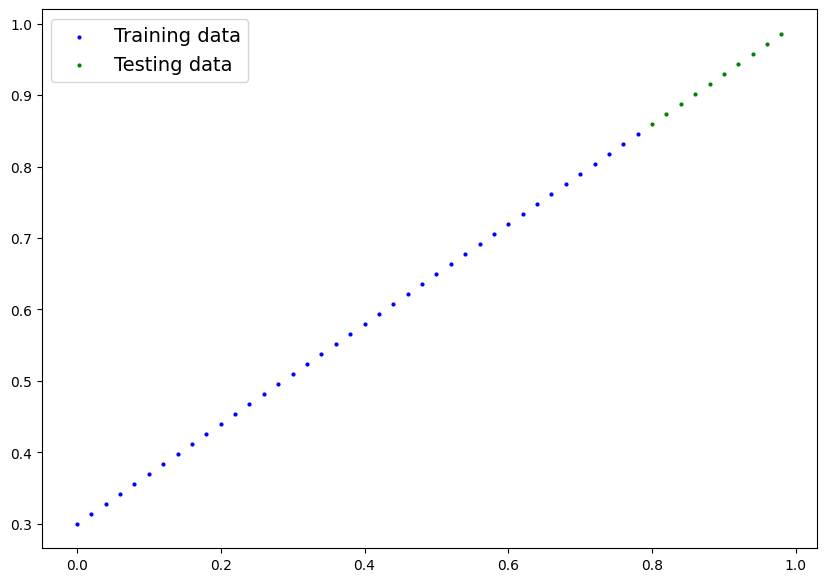

In [ ]:
plot_predictions()

# Build the Model

In [ ]:
## Build model
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the inputdata
    return self.weights * x + self.bias # this is the linear regression formula


In [ ]:
# Create a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
# Create an instance of the model
model_0 = LinearRegressionModel()
#Check out the paramters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

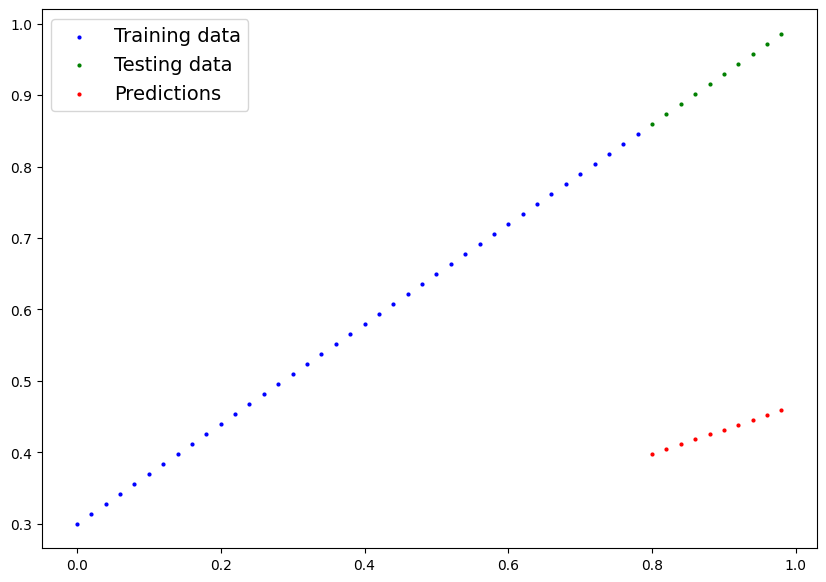

In [ ]:
# Making predictions using 'torch.inference_mode()'
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()
# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01)

# Building a training and testing loop in Pytorch

In [ ]:
torch.manual_seed(42)
# An epoch is one loop throug the data
epochs = 200
#Track different values
epoch_count = []
loss_values = []
test_loss_values = []
### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train()
  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()
  # 5. step the optimizer (perform gradient descent)
  optimizer.step()
  ### Testing
  # Turns off diffrent settings in the model not needed for evaluation/testing (batchNorm / Dropout)
  model_0.eval()
  # Turns off gradient tracking
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_0(X_test)
    # 2. Calucalte the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0 :
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

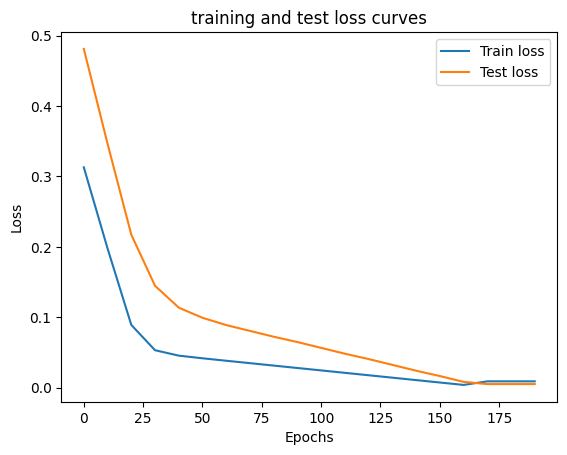

In [ ]:
# Plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

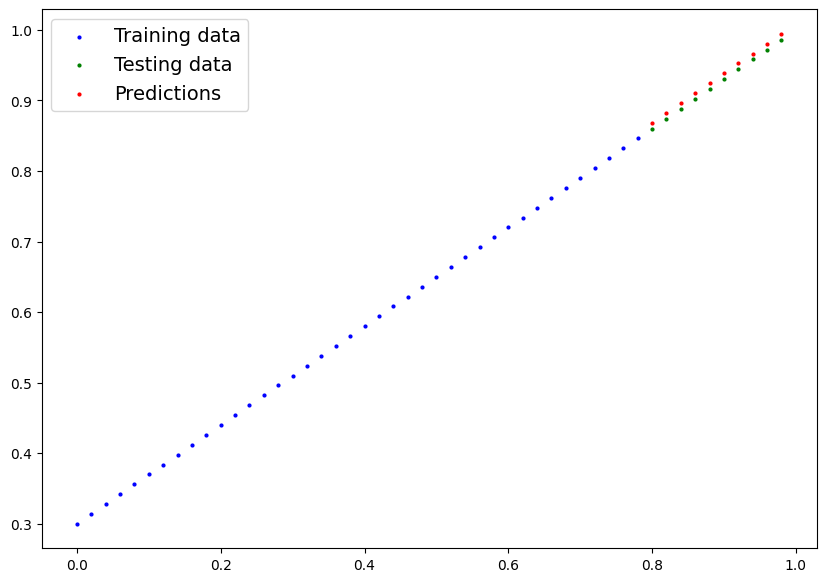

In [ ]:
with torch.inference_mode():
  pred = model_0(X_test)
plot_predictions(predictions=pred)

### Save the model

In [ ]:
# Saving a model in Pytorch
from pathlib import Path
# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# Create model save path
MODEL_NAME = "01_pytorch_workflow_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_0.pth


In [ ]:
! ls -l models

total 4
-rw-r--r-- 1 root root 1580 Dec 20 00:56 01_pytorch_workflow_0.pth


### Load the model

In [ ]:
# Loat the saved model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_0_predictions = loaded_model_0(X_test)
loaded_model_0_predictions

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with orignal model preds
pred == loaded_model_0_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])